# W06 - Class Practice
# Data Mining (Kamis)
* Jevon Ivander Kangsudarmanto / 0706022310028
* Felicia Tiffany / 0706022310032

# Part A - Data Preprocessing and EDA

In [1]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

## 1. Load and inspect the dataset: shape, types, missing values, statistical summary.

In [2]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url, delimiter = ';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## 2. Handle missing or inconsistent values, if any.

In [3]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


There are no missing values, but unknown values need to be checked more deeply.

In [4]:
# get statistical info from dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84]),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137]),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20,

The columns job, education, contact, and poutcome contain 'unknown' values. These likely represent missing or inconsistent data that needs to be addressed during the data preprocessing phase. Options include imputation (replacing 'unknowns' with estimated values) or treating 'unknown' as a separate category.

In [6]:
unknown_counts = {}
unknown_percentages = {}
total_rows = len(df)

for col in ['job', 'education', 'contact', 'poutcome']:
    unknown_count = df[df[col] == 'unknown'].shape[0]
    unknown_counts[col] = unknown_count
    unknown_percentages[col] = (unknown_count / total_rows) * 100

print("Count of 'unknown' values per column:")
display(unknown_counts)

print("\nPercentage of 'unknown' values per column:")
display(unknown_percentages)

Count of 'unknown' values per column:


{'job': 38, 'education': 187, 'contact': 1324, 'poutcome': 3705}


Percentage of 'unknown' values per column:


{'job': 0.8405220084052201,
 'education': 4.13625304136253,
 'contact': 29.285556292855563,
 'poutcome': 81.95089581950896}

In [7]:
# Drop columns with a high percentage of unknown values
df = df.drop(['contact', 'poutcome'], axis=1)

# Fill unknown values with the mode for columns with a low percentage of unknown values
for col in ['job', 'education']:
    mode_value = df[col].mode()[0]
    df[col] = df[col].replace('unknown', mode_value)

# Display the first few rows of the cleaned dataframe to verify the changes
display(df.head())

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,0,no
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,4,no
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,1,no
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,0,no


In [8]:
# show unique values count from dataset
unique_values_count = {col: df[col].nunique() for col in df.columns}
display(unique_values_count)

{'age': 67,
 'job': 11,
 'marital': 3,
 'education': 3,
 'default': 2,
 'balance': 2353,
 'housing': 2,
 'loan': 2,
 'day': 31,
 'month': 12,
 'duration': 875,
 'campaign': 32,
 'pdays': 292,
 'previous': 24,
 'y': 2}

The number of unique values indicates which columns may require one-hot encoding or nominal/ordinal encoding.

## 3. Perform 3 insightful visualizations with interpretation.

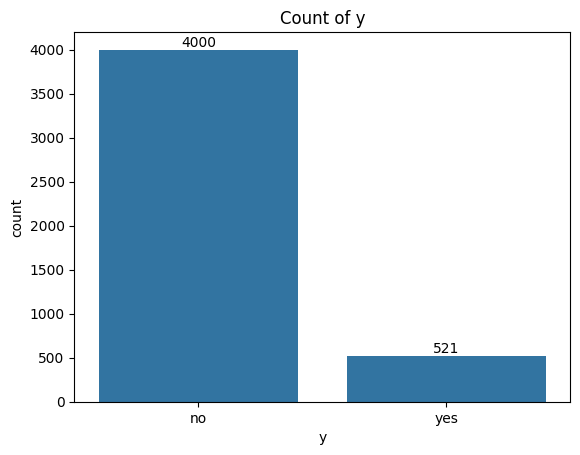

In [9]:
# show how many y
ax = sns.countplot(data=df, x='y')
plt.title('Count of y')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

This bar plot visualizes the distribution of the target variable 'y'. It shows the number of instances where the value of 'y' is 'no' and the number of instances where it is 'yes'. We can observe that the 'no' category has a significantly higher count than the 'yes' category, indicating an imbalanced dataset.

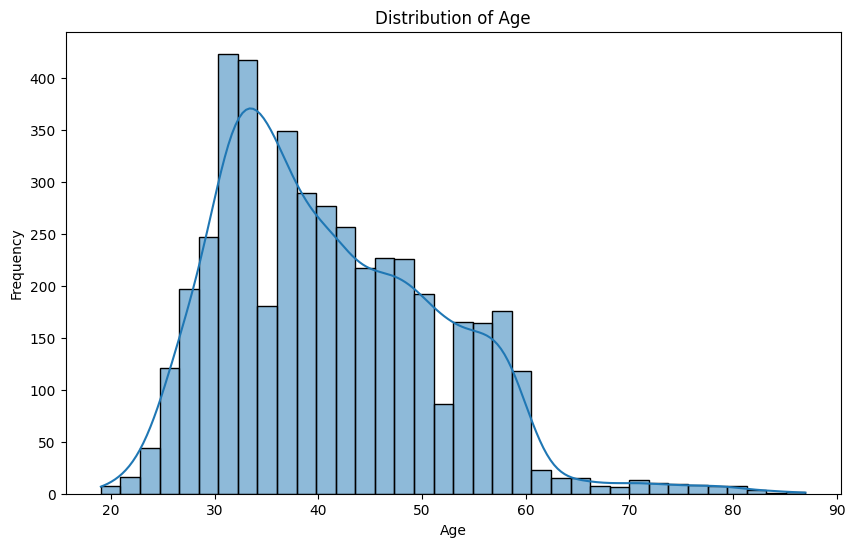

In [10]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of the 'age' variable. The data appears to be somewhat skewed to the right, with a peak in the 30s and early 40s. This suggests that a large portion of the individuals in the dataset are in this age range.

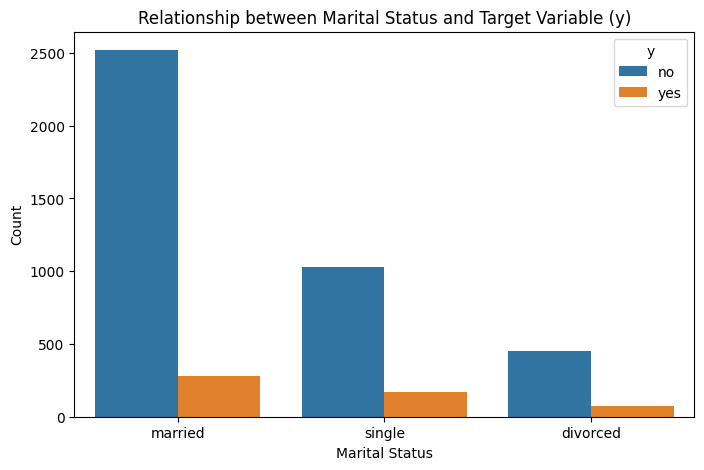

In [11]:
# Relationship between Marital Status and Target Variable
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='marital', hue='y')
plt.title('Relationship between Marital Status and Target Variable (y)')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

This bar plot illustrates the relationship between marital status and the target variable 'y'. It shows the count of 'yes' and 'no' for each marital status category (married, single, divorced). We can observe the distribution of the target variable within each marital group, which can provide insights into how marital status might influence the likelihood of a positive outcome ('yes').

The 'married' category represents the largest group of clients, followed by 'single', and then 'divorced'; notably, the absolute counts for both the 'yes' and 'no' outcomes also follow this descending order, being highest for 'married', second highest for 'single', and lowest for 'divorced'. A critical insight from the chart remains the significant class imbalance: across all three marital statuses, the count of clients who did not subscribe ('no') overwhelmingly surpasses the count of those who did ('yes'), indicating that non-subscription is the most common outcome.

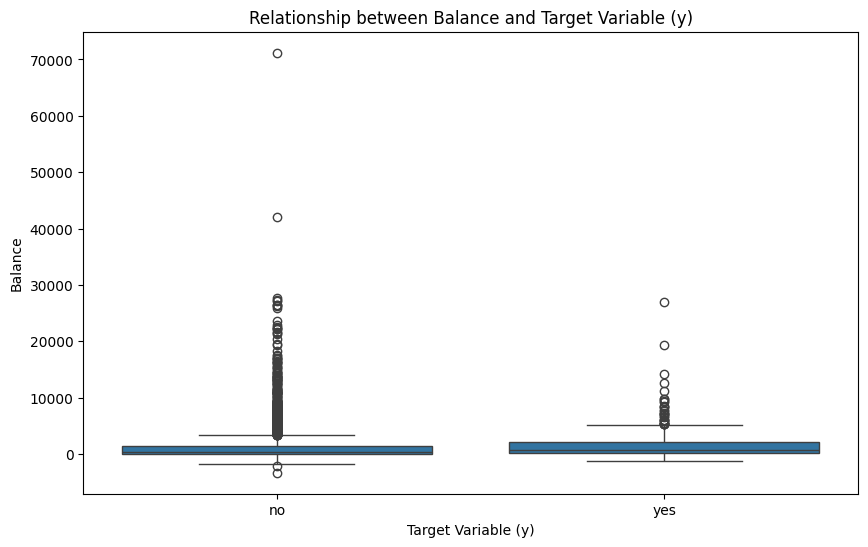

In [12]:
# Relationship between Balance and Target Variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='y', y='balance')
plt.title('Relationship between Balance and Target Variable (y)')
plt.xlabel('Target Variable (y)')
plt.ylabel('Balance')
plt.show()

This box plot shows the distribution of 'balance' for each category of the target variable 'y'. It allows us to see if there is a noticeable difference in the financial balance of clients who subscribed ('yes') versus those who did not ('no'). The box plot displays the median, quartiles, and potential outliers for 'balance' within each group, providing insight into how balance might be associated with the likelihood of subscribing to the term deposit. It appears that clients in the 'yes' category tend to have a higher median balance compared to those in the 'no' category. Additionally, both the 'yes' and 'no' groups show several outlier data points with significantly high or low balances.

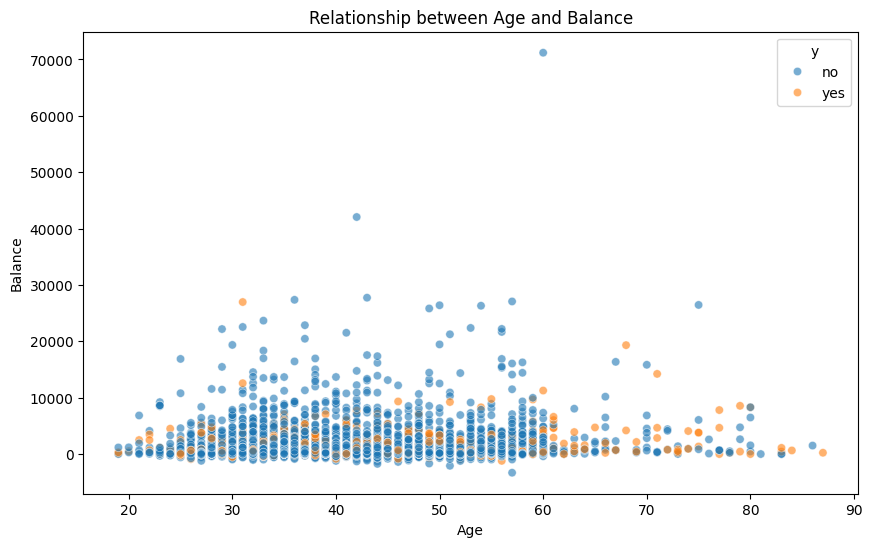

In [13]:
# Relationship between Age and Balance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='balance', hue='y', alpha=0.6)
plt.title('Relationship between Age and Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

This scatter plot shows the relationship between 'age' and 'balance', with points colored by the target variable 'y'. It allows us to visualize if there is any discernible pattern or clustering of data points based on age and balance, and how this relates to whether a client subscribed to the term deposit. Based on the scatter plot, there doesn't appear to be a strong linear relationship between age and balance. The data points are widely dispersed, and while there are some clusters, a clear pattern indicating a direct correlation between age and balance is not evident.

## 4. Encode the features.

In [14]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: default, housing, loan, y

one_hot_map = {
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'y': {'no': 0, 'yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)


# 2. Ordinal Encoding
# Columns: education, month
education_mapping = {'primary': 0, 'secondary': 1, 'tertiary': 2}
df_encoded['education'] = df_encoded['education'].map(education_mapping)
month_mapping = {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5,'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11}
df_encoded['month'] = df_encoded['month'].map(month_mapping)


# 3. Nominal Encoding
# Columns: job, marital
# Suppose you already fitted the encoder:
nominal_cols = ['job', 'marital']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10},
 'marital': {'divorced': 0, 'married': 1, 'single': 2}}


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
3841,32,9.0,1.0,1,0,5122,0,0,13,7,31,1,-1,0,0
2472,54,0.0,1.0,1,0,865,1,0,17,10,71,1,-1,0,0
3220,34,1.0,1.0,1,0,470,1,1,20,3,217,1,-1,0,0
2875,29,9.0,2.0,1,0,778,1,0,6,5,1994,2,-1,0,0
2107,35,4.0,0.0,2,0,649,0,0,16,3,177,1,-1,0,0


In [15]:
# checking encode result
df.loc[3841]

,3841
age,32
job,technician
marital,married
education,secondary
default,no
balance,5122
housing,no
loan,no
day,13
month,aug


Cross-checked one of the rows to ensure encoding is correct, and it has been confirmed as correct.

## 5. Split the dataset into Training set and Testing set.

### Separate features and target

Subtask:
Define the features (X) and the target variable (y).

Reasoning: Define the features (X) by dropping the target variable 'y' from the DataFrame and define the target variable (y) as the 'y' column.

In [16]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [17]:
X.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,30,10.0,1.0,0,0,1787,0,0,19,9,79,1,-1,0
1,33,7.0,1.0,1,0,4789,1,1,11,4,220,1,339,4
2,35,4.0,2.0,2,0,1350,1,0,16,3,185,1,330,1
3,30,4.0,1.0,2,0,1476,1,1,3,5,199,4,-1,0
4,59,1.0,1.0,1,0,0,1,0,5,4,226,1,-1,0


In [18]:
y.head() # ensure the target is correct

,y
0,0
1,0
2,0
3,0
4,0


### Split Data

Subtask:
Split the encoded data into training and testing sets.

Reasoning: Split the encoded feature DataFrame X and the target Series y into training and testing sets.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3164, 14), (1357, 14))

In [21]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
565,40,9.0,1.0,1,0,56,1,1,29,0,194,1,247,1
3480,47,7.0,1.0,1,0,440,1,0,12,5,91,1,-1,0
2125,52,9.0,1.0,1,0,3554,0,1,8,6,89,1,-1,0
3452,31,0.0,1.0,1,0,0,1,0,29,6,82,5,-1,0
1667,33,1.0,1.0,1,0,-346,1,1,23,4,29,3,-1,0


In [22]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
4274,35,1.0,1.0,0,0,378,1,0,16,4,427,3,-1,0
72,31,4.0,2.0,2,0,6248,1,0,9,4,154,2,-1,0
1065,30,10.0,1.0,2,0,0,1,0,18,10,756,1,-1,0
3185,42,0.0,1.0,1,0,529,1,1,19,10,193,3,-1,0
130,41,1.0,1.0,0,0,168,1,0,18,10,187,3,-1,0


# Part B - Model Development

## 1. Use Decision Tree, Random Forest, and XGBoost classification models

**Decision Tree**

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train_tree = tree.predict(X_train)
y_pred_test_tree = tree.predict(X_test)

print("Decision Tree")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_tree))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_tree))

Decision Tree

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00       354

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1190
           1       0.41      0.39      0.40       167

    accuracy                           0.86      1357
   macro avg       0.66      0.66      0.66      1357
weighted avg       0.85      0.86      0.86      1357



The Decision Tree model shows perfect performance on the training data, which is a strong indicator of overfitting. Its performance on the unseen test data is significantly lower, particularly for the minority class ('Yes'). While it performs well in identifying clients who will not subscribe ('No'), it struggles to accurately identify those who will subscribe ('Yes'), as indicated by the low precision, recall, and F1-score for class 1. This suggests that the model is not generalizing well to the minority class, which is a common issue in imbalanced datasets.

**Random Forest**

In [24]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=100, max_features="sqrt",
                               max_depth=6, max_leaf_nodes=6)
randomforest.fit(X_train, y_train)

y_pred_train_randomforest = randomforest.predict(X_train)
y_pred_test_randomforest = randomforest.predict(X_test)

print("Random Forest")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_randomforest))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_randomforest))

Random Forest

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2810
           1       0.00      0.00      0.00       354

    accuracy                           0.89      3164
   macro avg       0.44      0.50      0.47      3164
weighted avg       0.79      0.89      0.84      3164


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1190
           1       0.00      0.00      0.00       167

    accuracy                           0.88      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.77      0.88      0.82      1357



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

The Random Forest model, with the current hyperparameters, is not performing well in identifying the minority class ('Yes'). The precision, recall, and F1-score for class 1 are all 0.00 on both the training and test sets. This means the model is essentially predicting 'No' for all instances. While this results in a relatively high overall accuracy due to the imbalanced nature of the dataset (most instances are 'No'), it makes the model useless for identifying potential clients who will subscribe to the term deposit. This suggests that hyperparameter tuning and potentially addressing the class imbalance are necessary to improve the model's performance on the minority class.

**XGBoost**

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgboost = XGBClassifier(
    n_estimators=100,       # number of tree
    max_depth=6,            # max depth for each tree
    learning_rate=0.1,      # learning speed (default 0.1)
    subsample=0.8,          # proportion of samples used per tree
    colsample_bytree=0.8,   # proportion of features used by each tree
    objective='binary:logistic',  # binary classification
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'   # avoid warnings from XGBoost
)

# model practice
xgboost.fit(X_train, y_train)

# prediction
y_pred_train_xgboost = xgboost.predict(X_train)
y_pred_test_xgboost = xgboost.predict(X_test)

# evaluation
print("XGBoost Classifier")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_xgboost))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_xgboost))


XGBoost Classifier

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2810
           1       1.00      0.82      0.90       354

    accuracy                           0.98      3164
   macro avg       0.99      0.91      0.95      3164
weighted avg       0.98      0.98      0.98      3164


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1190
           1       0.56      0.29      0.39       167

    accuracy                           0.89      1357
   macro avg       0.74      0.63      0.66      1357
weighted avg       0.86      0.89      0.87      1357



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:05:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


The XGBoost model shows strong performance on the training data, with high precision, recall, and F1-scores for both classes. On the test set, the performance for class 0 remains good. However, the performance for the minority class ('Yes') drops significantly on the test set, particularly in terms of recall (0.29) and F1-score (0.39). This indicates that while the model is good at not incorrectly classifying 'No' instances as 'Yes' (decent precision for class 1), it struggles to identify a large portion of the actual 'Yes' instances (low recall for class 1).

Compared to the Random Forest models, XGBoost is performing better at identifying the minority class ('Yes'), although there is still room for improvement.

**What to do next?**

*   The F1 Score also significantly different so we need to handle this imbalance dataset.
*   The accuracy of training set is good and testing set is bad. This indicates overfitting, therefore we need to apply pre-prunning to the tree. We will tune the parameter by add a max_depth (limiting the depth/ branching of tree) and etc.
*   And maybe we need to select and drop some features for the model.

## 2. Hyperparameter tuning using GridSearchCV or manual parameter testing or evaluate performance using k-fold cross-validation (if needed).

**Decision Tree Classifier**

* Use criterion = “gini” or “entropy”.
* Tune max_depth, min_samples_split, min_samples_leaf,etc (if needed).

**Random Forest Classifier**

Tune hyperparameters such as n_estimators, max_depth, max_features, etc (if needed).

**Gradient Boosting Classifier**

1.   List item
2.   List item



Tune parameters such as n_estimators, learning_rate, max_depth, etc
(if needed).



## 3. Handle class imbalance (if necessary) using Oversampling/ Undersampling

*We will do step 3 first (handle class imbalance) after that doing step 2, because step 3 is more general and can affect the result for step 2*

### Oversampling using SMOTENC

In [26]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'default',
    'housing',
    'loan',
    'education',
    'month',
    'job',
    'marital'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 14), (2400, 14))

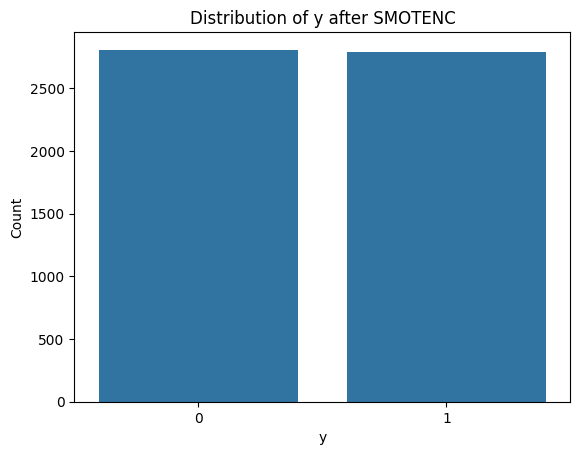

In [27]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of y after SMOTENC')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

We successfully fixed oversampling with SMOTENC.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   day        4521 non-null   int64 
 9   month      4521 non-null   object
 10  duration   4521 non-null   int64 
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  y          4521 non-null   object
dtypes: int64(7), object(8)
memory usage: 529.9+ KB


### Classification Model Result After SMOTENC

**Decision Tree**

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train_tree = tree.predict(X_train)
y_pred_test_tree = tree.predict(X_test)

print("Decision Tree")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_tree))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_tree))

Decision Tree

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1192
           1       0.87      0.89      0.88      1208

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



After applying SMOTENC, the Decision Tree model's performance on the test set has improved significantly. The F1-scores for both class 0 (No) and class 1 (Yes) are now much closer (0.87 and 0.88 respectively), indicating that the model is much better at classifying both the majority and minority classes. The accuracy on the test set is 0.88, and the macro average F1-score is also 0.88, suggesting a good overall balance in performance across both classes. This indicates that SMOTENC has helped in addressing the class imbalance and improving the Decision Tree's ability to generalize to unseen data.

**Random Forest**

In [30]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=100, max_features="sqrt",
                               max_depth=6, max_leaf_nodes=6)
randomforest.fit(X_train, y_train)

y_pred_train_randomforest = randomforest.predict(X_train)
y_pred_test_randomforest = randomforest.predict(X_test)

print("Random Forest")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_randomforest))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_randomforest))

Random Forest

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      2808
           1       0.81      0.88      0.84      2792

    accuracy                           0.84      5600
   macro avg       0.84      0.84      0.84      5600
weighted avg       0.84      0.84      0.84      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1192
           1       0.81      0.86      0.83      1208

    accuracy                           0.83      2400
   macro avg       0.83      0.83      0.83      2400
weighted avg       0.83      0.83      0.83      2400



With SMOTENC applied, the Random Forest model's performance has also improved considerably, especially for the minority class ('Yes'). On the test set, the F1-score for class 0 is 0.82 and for class 1 is 0.83. This is a significant improvement from the previous report where the model failed to identify any 'Yes' instances. The accuracy on the test set is 0.83, and the macro average F1-score is also 0.82. While the performance is better, it's still lower than the Decision Tree and XGBoost models after SMOTENC. This might suggest that the current hyperparameters for the Random Forest are not optimal, or that Random Forest is less sensitive to the benefits of SMOTENC with these specific settings.



**XGBoost**

In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgboost = XGBClassifier(
    n_estimators=100,       # number of tree
    max_depth=6,            # max depth for each tree
    learning_rate=0.1,      # learning speed (default 0.1)
    subsample=0.8,          # proportion of samples used per tree
    colsample_bytree=0.8,   # proportion of features used by each tree
    objective='binary:logistic',  # binary classification
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'   # avoid warnings from XGBoost
)

# model practice
xgboost.fit(X_train, y_train)

# prediction
y_pred_train_xgboost = xgboost.predict(X_train)
y_pred_test_xgboost = xgboost.predict(X_test)

# evaluation
print("XGBoost Classifier")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_xgboost))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_xgboost))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:06:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2808
           1       0.95      0.98      0.96      2792

    accuracy                           0.96      5600
   macro avg       0.96      0.96      0.96      5600
weighted avg       0.96      0.96      0.96      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1192
           1       0.90      0.93      0.92      1208

    accuracy                           0.91      2400
   macro avg       0.91      0.91      0.91      2400
weighted avg       0.91      0.91      0.91      2400



The XGBoost model continues to show strong performance after applying SMOTENC. On the test set, it achieves high F1-scores for both class 0 (0.91) and class 1 (0.92). The accuracy is 0.91, and the macro average F1-score is also 0.91. This indicates that XGBoost, in conjunction with SMOTENC, is performing very well in classifying both the majority and minority classes. Compared to the other two models, XGBoost seems to have benefited the most from SMOTENC and the current set of hyperparameters, achieving the highest overall balanced performance on the test set.

In summary, applying SMOTENC has generally improved the performance of all three models, particularly in their ability to classify the minority class.

**Performance is improving, but we want to try our luck. So, we want to handle overfitting with KFold Cross Validation.**

### KFold Cross Validation

In [32]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6400, Test set:1600
Fold:2, Train set: 6400, Test set:1600
Fold:3, Train set: 6400, Test set:1600
Fold:4, Train set: 6400, Test set:1600
Fold:5, Train set: 6400, Test set:1600


This output shows how your data is split into 5 parts (folds) for cross-validation. Each fold will be used as a test set once, while the rest are used to train the model.

### Classification Model Result After KFold Cross Validation

In [33]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.8761785  0.88875155 0.88068881 0.85164494 0.87897311]
Average score: 0.88


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_score = cross_val_score(RandomForestClassifier(n_estimators=100, max_features="sqrt",
                               max_depth=6, max_leaf_nodes=6, random_state=42), X, y, cv=kf, scoring="f1")
print(f'Random Forest Scores for each fold are: {rf_score}')
print(f'Random Forest Average score: {"{:.2f}".format(rf_score.mean())}')

Random Forest Scores for each fold are: [0.84059701 0.84533648 0.83362937 0.81796117 0.83950617]
Random Forest Average score: 0.84


In [36]:
from xgboost import XGBClassifier

# Re-instantiate XGBoost with the same parameters used previously
xgboost_cv = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_score = cross_val_score(xgboost_cv, X, y, cv=kf, scoring="f1")
print(f'XGBoost Scores for each fold are: {xgb_score}')
print(f'XGBoost Average score: {"{:.2f}".format(xgb_score.mean())}')

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:07:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:07:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:07:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:07:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:07:09] WARNING: /w

XGBoost Scores for each fold are: [0.92007322 0.93430657 0.92186554 0.90073529 0.92391304]
XGBoost Average score: 0.92


An average F1-score indicates moderate model performance in predicting y. There is still room for improvement and hyperparameter tuning to increase score consistency across each fold. We are still not satisfied, so we need to process it further.

### GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 0}
Best cross-validation f1 score: 0.869


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'max_features': ['sqrt'],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'random_state': [42]
}

rf_clf = RandomForestClassifier() # Initialize a Random Forest classifier
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search_rf.fit(X_train, y_train)

best_rf_clf = grid_search_rf.best_estimator_ # Get the best estimator from the grid search
y_pred_test_rf = best_rf_clf.predict(X_test)

print("Random Forest - Best parameters: ", grid_search_rf.best_params_)
print("Random Forest - Best cross-validation f1 score: {:.3f}".format(grid_search_rf.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Random Forest - Best parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}
Random Forest - Best cross-validation f1 score: 0.899


In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'random_state': [42]
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss') # Initialize an XGBoost classifier
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search_xgb.fit(X_train, y_train)

best_xgb_clf = grid_search_xgb.best_estimator_ # Get the best estimator from the grid search
y_pred_test_xgb = best_xgb_clf.predict(X_test)

print("XGBoost - Best parameters: ", grid_search_xgb.best_params_)
print("XGBoost - Best cross-validation f1 score: {:.3f}".format(grid_search_xgb.best_score_))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
XGBoost - Best parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.8}
XGBoost - Best cross-validation f1 score: 0.920


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:08:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [40]:
# Update the copied variables with the latest values
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()
X_test_copy = X_test.copy()
y_test_copy = y_test.copy()

y_pred_train_xgboost_copy = y_pred_train_xgboost.copy()
y_pred_test_xgboost_copy = y_pred_test_xgboost.copy()
y_pred_train_randomforest_copy = y_pred_train_randomforest.copy()
y_pred_test_randomforest_copy = y_pred_test_randomforest.copy()
y_pred_train_tree_copy = y_pred_train_tree.copy()
y_pred_test_tree_copy = y_pred_test_tree.copy()

Creating copies of X_train, y_train, X_test, y_test, and the prediction results at this point allows us to save the current state of our data and model performance as a checkpoint. This is useful for easily reverting to this state if subsequent steps, like feature selection, lead to worse performance, and for comparing the impact of those steps on the models. Next, we will proceed with feature selection to see if we can further improve model performance by using a reduced set of the most important features.

## 4. Optionally, perform feature selection (e.g., feature importance, correlation filtering)

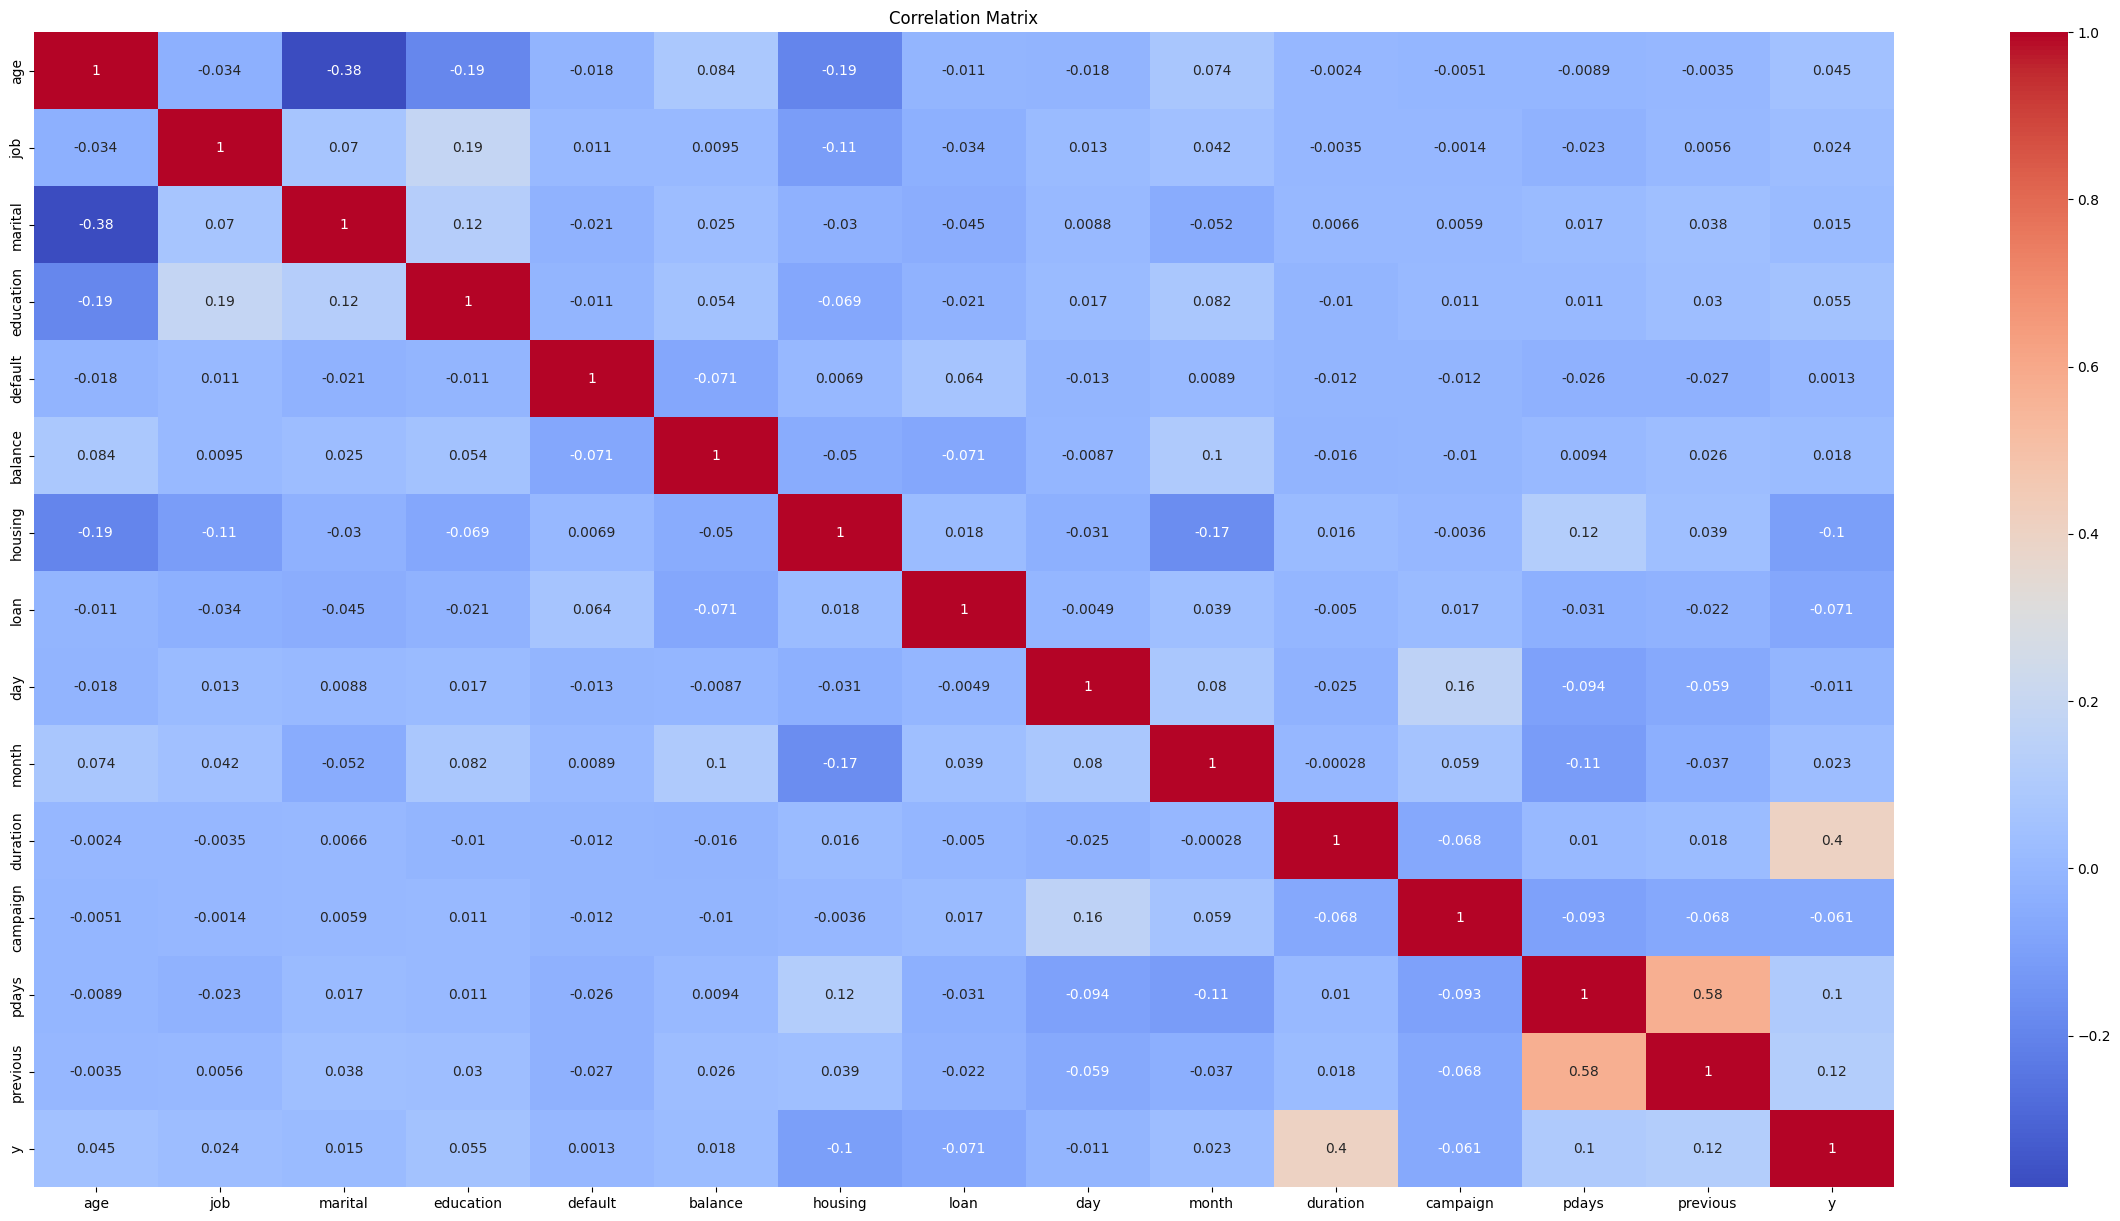

In [41]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Based on the heatmap, let's identify the features that have a strong correlation with 'y'. We'll also look for highly correlated features among themselves and choose the one with the stronger correlation to the target variable.

In [42]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance decision tree

Feature importances:
[0.05748155 0.02541264 0.01430603 0.01317419 0.00061225 0.1093997
 0.05360332 0.04656659 0.06675624 0.09738983 0.36305526 0.02659664
 0.1187442  0.00690157]


In [45]:
print("Feature importances:\n{}".format(randomforest.feature_importances_)) #function for feature importance random forest

Feature importances:
[2.98134632e-03 4.23466414e-03 0.00000000e+00 1.38860757e-02
 3.37244939e-04 1.23678018e-02 1.06483803e-01 1.02450075e-01
 1.63054821e-02 3.08686976e-02 4.45971219e-01 2.07504798e-02
 1.99771151e-01 4.35919599e-02]


In [44]:
print("Feature importances:\n{}".format(xgboost.feature_importances_)) #function for feature importance XGBoost

Feature importances:
[0.02313483 0.03969037 0.03730652 0.03781142 0.         0.03648836
 0.12653631 0.23464276 0.03554359 0.0626418  0.17473415 0.04447429
 0.08782812 0.05916745]


In [46]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


Feature Importances Decision Tree


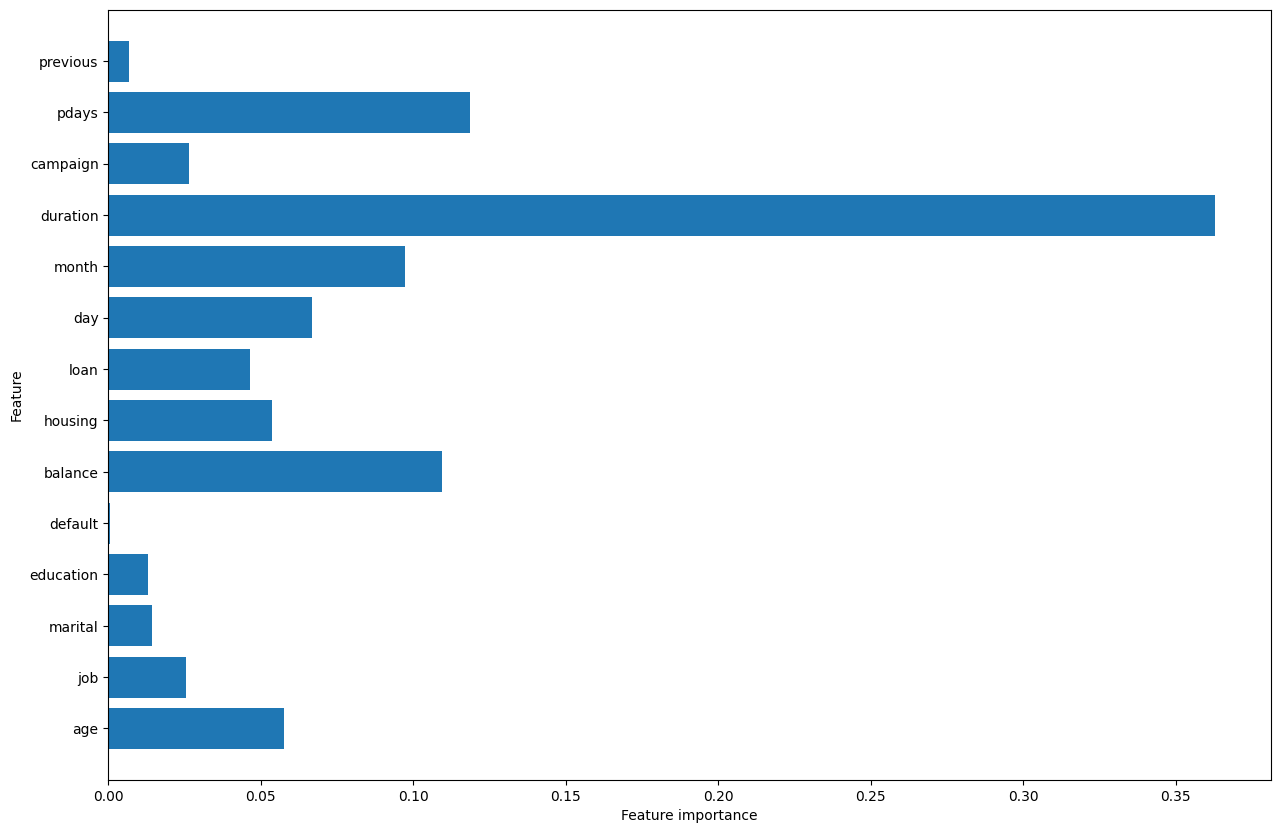

In [47]:
print("Feature Importances Decision Tree")
plot_feature_importances_attrition(tree)

Feature Importances Random Forest


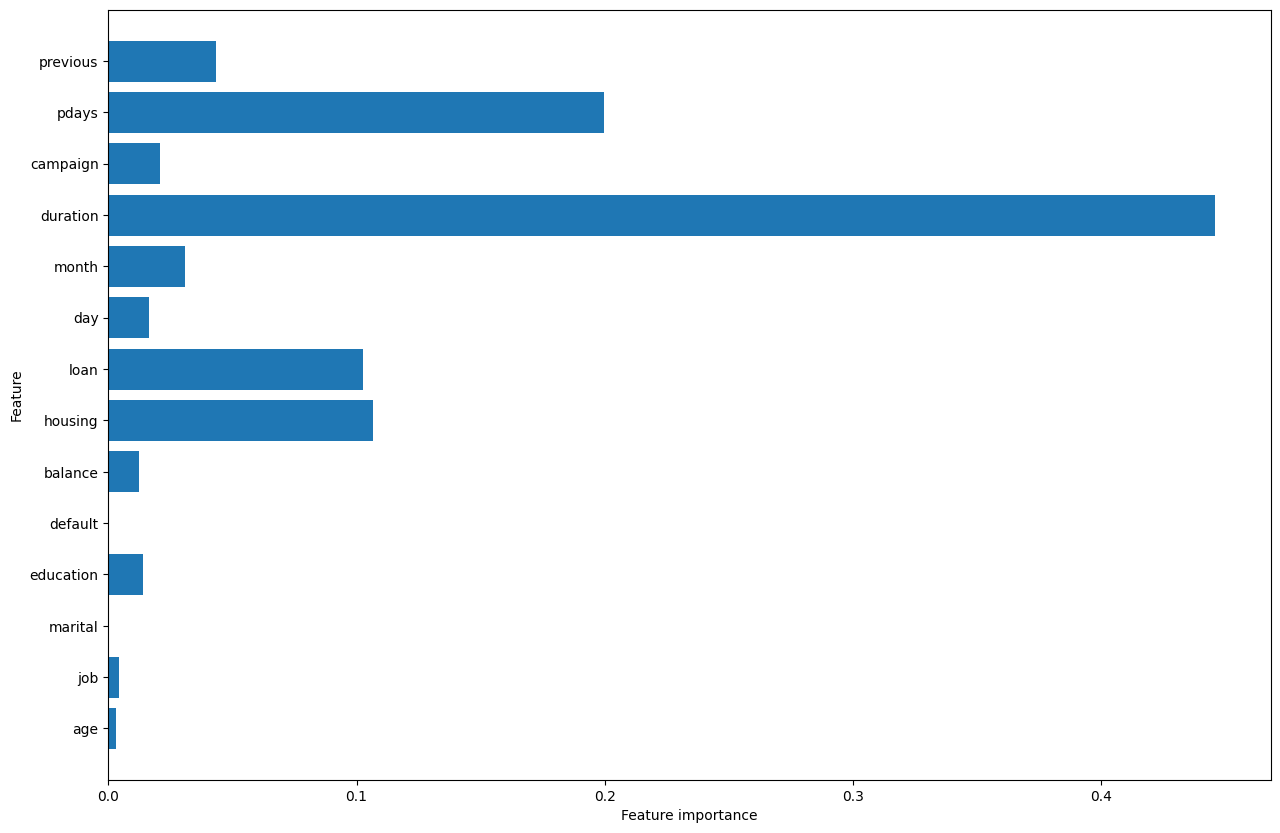

In [48]:
print("Feature Importances Random Forest")
plot_feature_importances_attrition(randomforest)

Feature Importances XGBoost


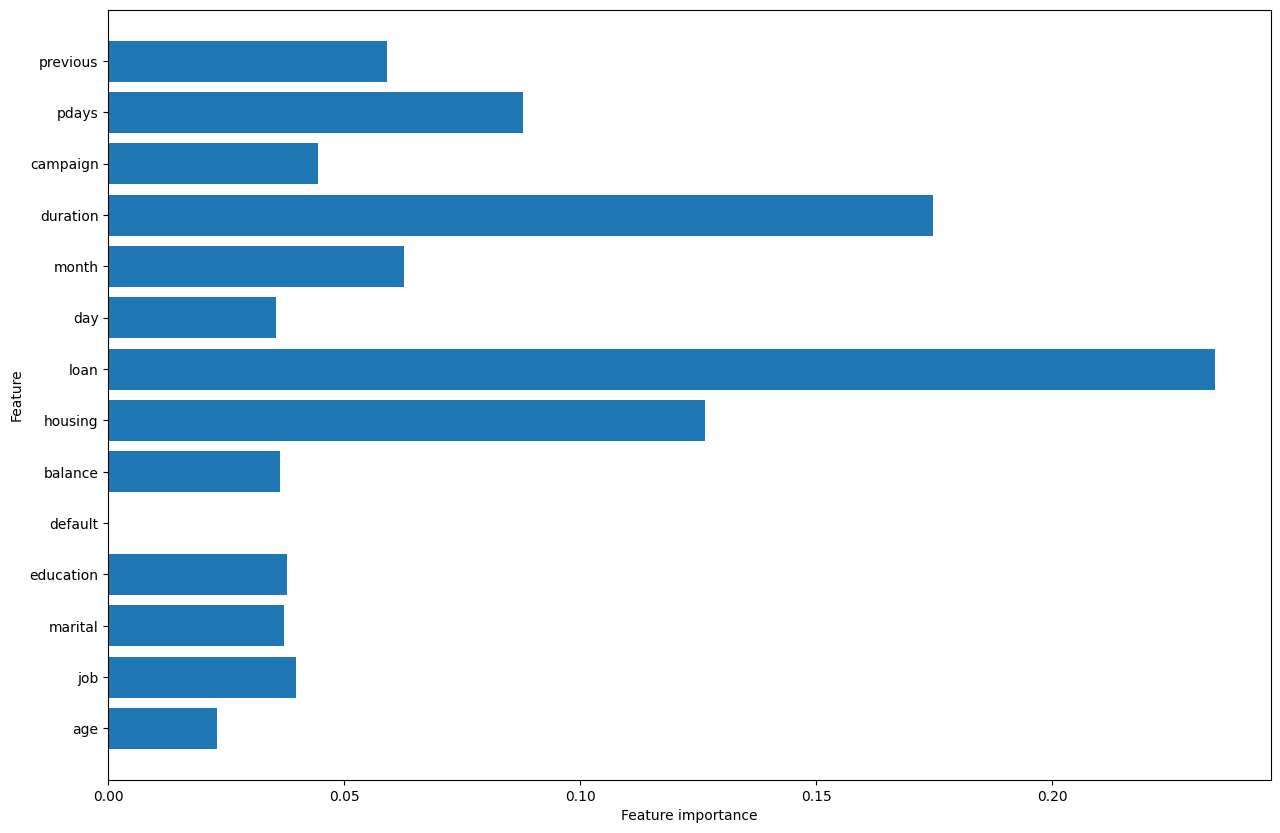

In [49]:
print("Feature Importances XGBoost")
plot_feature_importances_attrition(xgboost)

In [50]:
# Show feature importances greater than 0.05 (Decision Tree)
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
duration,0.363055
pdays,0.118744
balance,0.109400
month,0.097390
day,0.066756
age,0.057482
housing,0.053603


In [51]:
# Show feature importances greater than 0.05 (Random Forest)
feature_importances = pd.Series(randomforest.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
duration,0.445971
pdays,0.199771
housing,0.106484
loan,0.102450


In [52]:
# Show feature importances greater than 0.05 (XGBoost)
feature_importances = pd.Series(xgboost.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
loan,0.234643
duration,0.174734
housing,0.126536
pdays,0.087828
month,0.062642
previous,0.059167


In [53]:
# Create a copy of df_encoded
df_encoded_copy = df_encoded.copy()

In [54]:
# using only important features for the prediction (decision tree)
important_features = ["duration", "pdays", "balance", "month"]
X_importance_dt = df_encoded_copy[important_features] #input
y_importance_dt = df_encoded_copy['y'] #target

In [55]:
display(X_importance_dt)
display(y_importance_dt)

,duration,pdays,balance,month
0,79,-1,1787,9
1,220,339,4789,4
2,185,330,1350,3
3,199,-1,1476,5
4,226,-1,0,4
...,...,...,...,...
4516,329,-1,-333,6
4517,153,-1,-3313,4
4518,151,-1,295,7
4519,129,211,1137,1


,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [56]:
# using only important features for the prediction (random forest)
important_features = ["pdays", "duration", "loan", "housing"]
X_importance_rf = df_encoded_copy[important_features] #input
y_importance_rf = df_encoded_copy['y'] #target

In [57]:
display(X_importance_rf)
display(y_importance_rf)

,pdays,duration,loan,housing
0,-1,79,0,0
1,339,220,1,1
2,330,185,0,1
3,-1,199,1,1
4,-1,226,0,1
...,...,...,...,...
4516,-1,329,0,1
4517,-1,153,1,1
4518,-1,151,0,0
4519,211,129,0,0


,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [58]:
# using only important features for the prediction (xgboost)
important_features = ["pdays", "duration", "loan", "housing"]
X_importance_xg = df_encoded_copy[important_features] #input
y_importance_xg = df_encoded_copy['y'] #target

In [59]:
display(X_importance_xg)
display(y_importance_xg)

,pdays,duration,loan,housing
0,-1,79,0,0
1,339,220,1,1
2,330,185,0,1
3,-1,199,1,1
4,-1,226,0,1
...,...,...,...,...
4516,-1,329,0,1
4517,-1,153,1,1
4518,-1,151,0,0
4519,211,129,0,0


,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [60]:
# oversampling again (decision tree)
categorical_features = ["month"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance_dt, y_importance_dt = smotenc.fit_resample(X_importance_dt, y_importance_dt)

X_train, X_test, y_train, y_test = train_test_split(X_importance_dt, y_importance_dt, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 4), (2400, 4))

In [61]:
# oversampling again (random forest)
categorical_features = ["housing", "loan"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance_rf, y_importance_rf = smotenc.fit_resample(X_importance_rf, y_importance_rf)

X_train, X_test, y_train, y_test = train_test_split(X_importance_rf, y_importance_rf, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 4), (2400, 4))

In [62]:
# oversampling again (xgboost)
categorical_features = ["housing", "loan"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance_xg, y_importance_xg = smotenc.fit_resample(X_importance_xg, y_importance_xg)

X_train, X_test, y_train, y_test = train_test_split(X_importance_xg, y_importance_xg, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 4), (2400, 4))

In [63]:
# Decision Tree
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance_dt, y_importance_dt, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_tree = importance_tree.predict(X_train_importance)
y_pred_test_tree = importance_tree.predict(X_test_importance)

print("Decision Tree")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_tree))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_tree))

Decision Tree

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1206
           1       0.85      0.87      0.86      1194

    accuracy                           0.85      2400
   macro avg       0.85      0.85      0.85      2400
weighted avg       0.85      0.85      0.85      2400



In [66]:
# Random Forest
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance_rf, y_importance_rf, test_size=0.3, random_state=42)

importance_rf = RandomForestClassifier(n_estimators=100, max_features="sqrt",
                               max_depth=6, max_leaf_nodes=6)
importance_rf.fit(X_train, y_train)

y_pred_train_randomforest = importance_rf.predict(X_train_importance)
y_pred_test_randomforest = importance_rf.predict(X_test_importance)

print("Random Forest")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_randomforest))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_randomforest))

Random Forest

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.82      0.73      0.78      2794
           1       0.76      0.84      0.80      2806

    accuracy                           0.79      5600
   macro avg       0.79      0.79      0.79      5600
weighted avg       0.79      0.79      0.79      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.84      0.76      0.79      1206
           1       0.78      0.85      0.81      1194

    accuracy                           0.80      2400
   macro avg       0.81      0.80      0.80      2400
weighted avg       0.81      0.80      0.80      2400



In [67]:
# XGBoost
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance_xg, y_importance_xg, test_size=0.3, random_state=42)

importance_xg = XGBClassifier(
    n_estimators=100,       # number of tree
    max_depth=6,            # max depth for each tree
    learning_rate=0.1,      # learning speed (default 0.1)
    subsample=0.8,          # proportion of samples used per tree
    colsample_bytree=0.8,   # proportion of features used by each tree
    objective='binary:logistic',  # binary classification
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'   # avoid warnings from XGBoost
)

# model practice
importance_xg.fit(X_train, y_train)

y_pred_train_xgboost = importance_xg.predict(X_train_importance)
y_pred_test_xgboost = importance_xg.predict(X_test_importance)

# evaluation
print("XGBoost Classifier")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_xgboost))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_xgboost))


XGBoost Classifier

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2794
           1       0.83      0.84      0.83      2806

    accuracy                           0.83      5600
   macro avg       0.83      0.83      0.83      5600
weighted avg       0.83      0.83      0.83      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1206
           1       0.84      0.84      0.84      1194

    accuracy                           0.84      2400
   macro avg       0.84      0.84      0.84      2400
weighted avg       0.84      0.84      0.84      2400



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:10:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Upon evaluating the performance of the models after applying feature selection, we observed a decrease in overall accuracy, as well as a decline in metrics like the F1-score for both the majority and minority classes, when compared to the results obtained after SMOTENC, GridSearchCV, and KFold cross-validation on the full feature set. This indicates that the reduced feature set did not capture all the necessary information for the models to perform optimally. Consequently, we will not be using the feature-selected dataset for our final models and will proceed with the models trained on the complete set of features.

# Part C - Model Evaluation

## 1. Make a confusion matrices

## 2. Evaluate models on both training and test data using: Accuracy, Precision, Recall, F1-score

Based on our analysis and evaluation, we will proceed with the data that has undergone SMOTENC for handling class imbalance, and the models that have been tuned using KFold cross-validation and GridSearchCV on the full feature set (by using copy variable). Although we explored feature selection, the performance of the models decreased with the reduced feature set. Therefore, we have decided not to use feature-selected data and will utilize the models trained on the complete dataset after the aforementioned preprocessing and tuning steps, as they have demonstrated the best performance so far.

**Confusion Matrix Decision Tree**

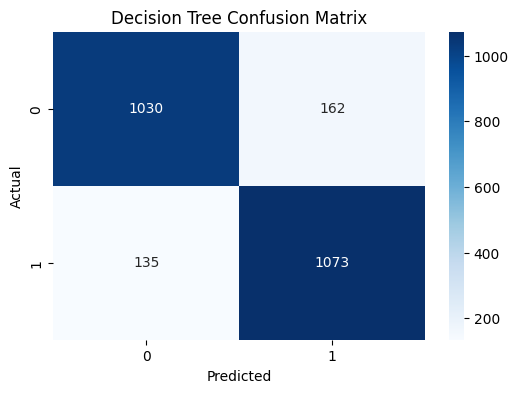

In [69]:
from sklearn.metrics import confusion_matrix
# Decision Tree Confusion Matrix
cm_tree_final = confusion_matrix(y_test_copy, y_pred_test_tree_copy)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree_final, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
# Extract TN, FP, FN, TP from the confusion matrix for the Decision Tree model
tn, fp, fn, tp = cm_tree_final.ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 1030
False Positives (FP): 162
False Negatives (FN): 135
True Positives (TP): 1073


* True Negatives (TN): 1030 - This means the model correctly identified 1030 instances where the client did not subscribe to the term deposit (actual class 0) and predicted 'No' (predicted class 0).
* False Positives (FP): 162 - This means the model incorrectly predicted that 162 clients would subscribe (predicted class 1) when they actually did not subscribe (actual class 0). These are also known as Type I errors.
* False Negatives (FN): 135 - This means the model incorrectly predicted that 135 clients would not subscribe (predicted class 0) when they actually did subscribe (actual class 1). These are also known as Type II errors.
* True Positives (TP): 1073 - This means the model correctly identified 1073 instances where the client did subscribe (actual class 1) and predicted 'Yes' (predicted class 1).

In [71]:
print("Decision Tree")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_copy, y_pred_train_tree_copy))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_copy, y_pred_test_tree_copy))

Decision Tree

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1192
           1       0.87      0.89      0.88      1208

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



The Decision Tree model shows perfect performance on the training data (1.00 for all metrics), which strongly indicates overfitting. However, its performance on the test set after SMOTENC is significantly better than before, with an overall accuracy of 0.88. Importantly, the model now demonstrates good and balanced performance for both classes, achieving F1-scores of 0.87 for class 0 ('No') and 0.88 for class 1 ('Yes'), indicating a substantial improvement in its ability to correctly identify clients who will subscribe.

**Confusion Matrix Random Forest**

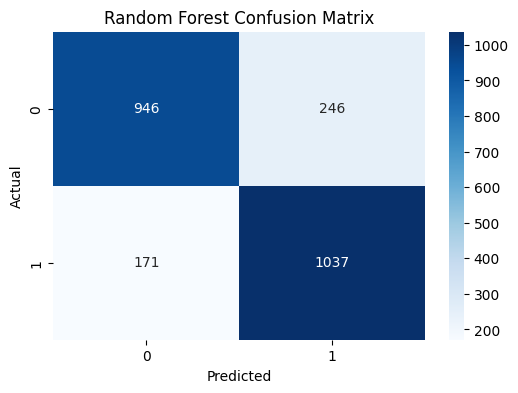

In [72]:
# Random Forest Confusion Matrix
cm_rf_final = confusion_matrix(y_test_copy, y_pred_test_randomforest_copy)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_final, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [73]:
# Extract TN, FP, FN, TP from the confusion matrix for the Decision Tree model
tn, fp, fn, tp = cm_rf_final.ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 946
False Positives (FP): 246
False Negatives (FN): 171
True Positives (TP): 1037


* True Negatives (TN): 946 - This means the model correctly identified 946 instances where the client did not subscribe to the term deposit (actual class 0) and predicted 'No' (predicted class 0).
* False Positives (FP): 246 - This means the model incorrectly predicted that 246 clients would subscribe (predicted class 1) when they actually did not subscribe (actual class 0). These are also known as Type I errors.
* False Negatives (FN): 171 - This means the model incorrectly predicted that 171 clients would not subscribe (predicted class 0) when they actually did subscribe (actual class 1). These are also known as Type II errors.
* True Positives (TP): 1037 - This means the model correctly identified 1037 instances where the client did subscribe (actual class 1) and predicted 'Yes' (predicted class 1).

In [74]:
print("Random Forest")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_copy, y_pred_train_randomforest_copy))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_copy, y_pred_test_randomforest_copy))

Random Forest

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      2808
           1       0.81      0.88      0.84      2792

    accuracy                           0.84      5600
   macro avg       0.84      0.84      0.84      5600
weighted avg       0.84      0.84      0.84      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1192
           1       0.81      0.86      0.83      1208

    accuracy                           0.83      2400
   macro avg       0.83      0.83      0.83      2400
weighted avg       0.83      0.83      0.83      2400



For Random Forest, on the test set, the F1-score for class 0 is 0.82 and for class 1 is 0.83. This is a significant improvement from the previous report where the model failed to identify any 'Yes' instances. The accuracy on the test set is 0.83, and the macro average F1-score is also 0.83. While the performance is better, it's still lower than the Decision Tree and XGBoost models after SMOTENC. This might suggest that the current hyperparameters for the Random Forest are not optimal, or that Random Forest is less sensitive to the benefits of SMOTENC/KFold Cross Validation/GridSearchCV with these specific settings.

**Confusion Matrix XGBoost**

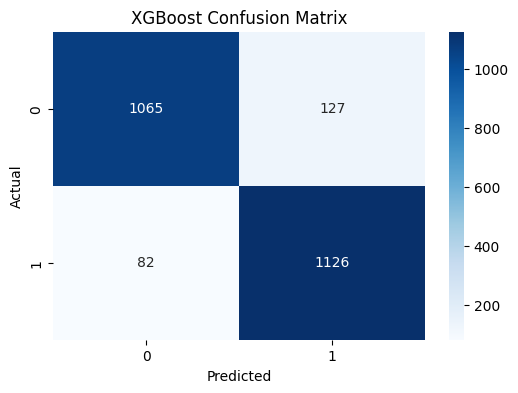

In [75]:
# XGBoost Confusion Matrix
cm_xgb_final = confusion_matrix(y_test_copy, y_pred_test_xgboost_copy)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb_final, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [76]:
# Extract TN, FP, FN, TP from the confusion matrix for the Decision Tree model
tn, fp, fn, tp = cm_xgb_final.ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 1065
False Positives (FP): 127
False Negatives (FN): 82
True Positives (TP): 1126


* True Negatives (TN): 1065 - This means the model correctly identified 1065 instances where the client did not subscribe to the term deposit (actual class 0) and predicted 'No' (predicted class 0).
* False Positives (FP): 127 - This means the model incorrectly predicted that 127 clients would subscribe (predicted class 1) when they actually did not subscribe (actual class 0). These are also known as Type I errors.
* False Negatives (FN): 82 - This means the model incorrectly predicted that 82 clients would not subscribe (predicted class 0) when they actually did subscribe (actual class 1). These are also known as Type II errors.
* True Positives (TP): 1126 - This means the model correctly identified 1126 instances where the client did subscribe (actual class 1) and predicted 'Yes' (predicted class 1).

In [77]:
print("XGBoost Classifier")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_copy, y_pred_train_xgboost_copy))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_copy, y_pred_test_xgboost_copy))

XGBoost Classifier

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2808
           1       0.95      0.98      0.96      2792

    accuracy                           0.96      5600
   macro avg       0.96      0.96      0.96      5600
weighted avg       0.96      0.96      0.96      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1192
           1       0.90      0.93      0.92      1208

    accuracy                           0.91      2400
   macro avg       0.91      0.91      0.91      2400
weighted avg       0.91      0.91      0.91      2400



The XGBoost model continues to show strong performance after applying model development. On the test set, it achieves high F1-scores for both class 0 (0.91) and class 1 (0.92). The accuracy is 0.91, and the macro average F1-score is also 0.91. This indicates that XGBoost is performing very well in classifying both the majority and minority classes. Compared to the other two models, XGBoost seems to have benefited the most from model development, achieving the highest overall balanced performance on the test set.

## 3. Evaluate each model by creating a comparison table summarizing all models:

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# --- Decision Tree ---
acc_dt = accuracy_score(y_test_copy, y_pred_test_tree_copy)
prec_dt = precision_score(y_test_copy, y_pred_test_tree_copy)
rec_dt = recall_score(y_test_copy, y_pred_test_tree_copy)
f1_dt = f1_score(y_test_copy, y_pred_test_tree_copy)

# --- Random Forest ---
acc_rf = accuracy_score(y_test_copy, y_pred_test_randomforest_copy)
prec_rf = precision_score(y_test_copy, y_pred_test_randomforest_copy)
rec_rf = recall_score(y_test_copy, y_pred_test_randomforest_copy)
f1_rf = f1_score(y_test_copy, y_pred_test_randomforest_copy)

# --- XGBoost ---
acc_xgb = accuracy_score(y_test_copy, y_pred_test_xgboost_copy)
prec_xgb = precision_score(y_test_copy, y_pred_test_xgboost_copy)
rec_xgb = recall_score(y_test_copy, y_pred_test_xgboost_copy)
f1_xgb = f1_score(y_test_copy, y_pred_test_xgboost_copy)

# make table
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [acc_dt, acc_rf, acc_xgb],
    'Precision': [prec_dt, prec_rf, prec_xgb],
    'Recall': [rec_dt, rec_rf, rec_xgb],
    'F1-score': [f1_dt, f1_rf, f1_xgb]
})

# show tabel
print(results.round(2))

           Model  Accuracy  Precision  Recall  F1-score
0  Decision Tree      0.88       0.87    0.89      0.88
1  Random Forest      0.83       0.81    0.86      0.83
2        XGBoost      0.91       0.90    0.93      0.92


Breakdown of what the metrics represent:
- **Accuracy:** The overall percentage of correctly classified instances.
- **Precision:** Of all instances predicted as positive (class 1), what percentage were actually positive. High precision means fewer False Positives.
- **Recall:** Of all actual positive instances (class 1), what percentage were correctly identified. High recall means fewer False Negatives.
- **F1-score:** The harmonic mean of precision and recall. It's a good measure when you need a balance between precision and recall, especially with imbalanced datasets.

# Evaluation for each model:

* **Decision Tree:**
    - Accuracy: 0.88
    - Precision: 0.87
    - Recall: 0.89
    - F1-score: 0.88
    - The Decision Tree model shows good performance, with a balanced F1-score of 0.88. Its recall is slightly higher than its precision, indicating it's slightly better at identifying actual positive cases than avoiding false positives.

* **Random Forest:**
    - Accuracy: 0.83
    - Precision: 0.81
    - Recall: 0.86
    - F1-score: 0.83
    - The Random Forest model has lower overall accuracy and F1-score (0.83) compared to the Decision Tree and XGBoost. While its recall (0.86) is decent, its precision (0.81) is the lowest, meaning it has more False Positives compared to the other models.

* **XGBoost:**
    - Accuracy: 0.91
    - Precision: 0.90
    - Recall: 0.93
    - F1-score: 0.92
    - The XGBoost model stands out as the best performer across all metrics. It has the highest accuracy (0.91) and the highest F1-score (0.92). Both its precision (0.90) and recall (0.93) are high, indicating it is effective at both identifying actual positive cases and avoiding false positives.

**Overall Evaluation:**

Comparing the F1-scores, which are particularly useful for evaluating performance on the minority class in potentially imbalanced datasets, XGBoost (0.92) performs significantly better than the Decision Tree (0.88) and Random Forest (0.83). XGBoost also has the highest accuracy, precision, and recall.

Therefore, based on these metrics, the **XGBoost model performed best overall** on this dataset after the preprocessing and tuning steps.

# Part D - Discussion & Insights

Answer the following:

* Which model performed best overall?
* Did ensemble methods (RF, XGBoost) improve performance compared to a single Decision Tree?
* How could the bank use these insights to refine its marketing strategy?

Here are the answers to the discussion questions:

* **Which model performed best overall?**
    Based on the evaluation metrics, particularly the F1-score which is a balanced measure of precision and recall, the **XGBoost model performed best overall**. It achieved the highest accuracy (0.91) and F1-score (0.92) on the test set, demonstrating strong performance in correctly classifying both clients who subscribe and those who do not.

* **Did ensemble methods (RF, XGBoost) improve performance compared to a single Decision Tree?**
    Yes, the ensemble methods, specifically XGBoost, significantly improved performance compared to the initial single Decision Tree model (before tuning and SMOTENC). The initial Decision Tree was heavily overfitted and struggled with the minority class. After applying SMOTENC, KFold CV, and GridSearchCV, both the Decision Tree and XGBoost models showed good performance, but XGBoost still outperformed the tuned Decision Tree in terms of overall metrics. The Random Forest model also improved significantly after SMOTENC but did not reach the same level of performance as the tuned Decision Tree or XGBoost with the current hyperparameters.Further specific tuning for Random Forest could potentially improve its performance, but this was not pursued in this case as XGBoost emerged as the best-performing model.


* **How could the bank use these insights to refine its marketing strategy?**
    The bank can use the insights from the best-performing model (XGBoost) to refine its marketing strategy in several ways:
    * **Targeted Campaigns:** The model can be used to predict which clients are most likely to subscribe to a term deposit. The bank can then focus its marketing efforts on these high-potential clients, leading to a more efficient allocation of resources and potentially higher conversion rates.
    * **Identify Key Features:** By examining the feature importances from the models (although we decided not to use feature-selected data for the final models, the importance scores themselves can still be insightful), the bank can understand which client characteristics or past interactions are most indicative of a successful subscription. This knowledge can inform the messaging and targeting of marketing campaigns. For example, if 'duration' (contact duration) and 'pdays' (days since last contact from previous campaign) are important features, it suggests that the timing and length of contact are crucial.
    * **Personalized Offers:** Understanding the factors that influence subscription can help the bank tailor offers and communication to individual clients or segments of clients, making the marketing more relevant and persuasive.
    * **Resource Optimization:** By predicting which clients are unlikely to subscribe, the bank can avoid spending marketing resources on those individuals, further optimizing their budget.
    * **Risk Assessment:** While this model is focused on predicting subscription, the insights into client behavior could potentially inform other areas, such as identifying clients who might be more receptive to other bank products.